## Problem Statement¶

Company Context:


X Education, an online education company, targets industry professionals by selling online courses. Leads are generated from website visitors who engage through browsing, filling forms, or referrals. Despite acquiring a large number of leads, the company's lead conversion rate is low, averaging 30%.



Business Challenge:


The company aims to improve efficiency by identifying "Hot Leads"—those with a higher probability of converting into paying customers. This would allow the sales team to focus on high-potential leads, improving the lead conversion rate and reducing wasted effort. The goal is to achieve a target lead conversion rate of 80%.




Proposed Solution:


The company seeks a logistic regression model that can assign a lead score (0–100) to each lead, predicting their likelihood of conversion. Leads with higher scores should be prioritized by the sales team, while those with lower scores require less attention.

In [1]:
# Importing the necessary libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
# Reading the dataset:
leads = pd.read_csv('Leads.csv')

In [3]:
# Looking at the first few entries:

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Looking at the shape of the dataset:

leads.shape

(9240, 37)

In [5]:
# Looking at the columns of the dataset:

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
# Checking the summary of the dataset:

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Checking the info to see the datatypes of the features:

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are quite a few categorical variables present for which dummies will need to be created and also null values are
present which need to be taken care of. 

## Step 1: Data prep and cleaning.

In [8]:
leads.isnull().sum().sort_values(ascending = False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

As we can see there are quite a few columns with high number of missing values. We will be setting a cutoff of 3000 missing
values and would be deleting those columns with more missing values than the cutoff. 

In [9]:
# Drop all the columns in which greater than 3000 missing values are present

for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, axis = 1, inplace=True)

In [10]:
# Checking for the missing values again

leads.isnull().sum().sort_values(ascending = False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [11]:
# Dropping the variables city and country since they will be of no great use for the model.
leads.drop('City', axis = 1, inplace=True)
leads.drop('Country', axis = 1, inplace=True)

In [12]:
# Also removing the columns porspectID and lead number as they are useless for our model.

leads.drop('Prospect ID', axis = 1, inplace = True)
leads.drop('Lead Number', axis = 1, inplace = True)

In [13]:
# Checking the percentage of missing values now in each column

round(((leads.isnull().sum()/len(leads.index))*100), 2).sort_values(ascending=False)


Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Search                                            0.00
Newspaper 

The problem statement mentioned that some columns have a category called 'select' as the prospects didnt select any option and 
kept it as is. Lets have a look at the value counts of the columns to check each of the variables. 

In [14]:
for col in leads.columns:
    print(leads[col].astype('category').value_counts())
    print('-'*80)

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
--------------------------------------------------------------------------------
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
--------------------------------------------------------------------------------
Do Not Email
No     8506
Yes     734
Name: count, dtype:

 We can see that the variables 'lead profile' and 'How did you hear about X Education' have majority of rows with the select
value and imputing them with something else wont of any particular use to us. So we will be removing these two columns. 

In [15]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace=True)

Also when we got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include 'Do Not Call', 'Search, Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'. We will go ahead and drop these columns since they will be of no particular use to the model. 

In [16]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis = 1, inplace=True)

In [17]:
# Checking null values again.

leads.isnull().sum().sort_values(ascending = False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Do Not Email                                        0
Converted                                           0
Total Time Spent on Website                         0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [18]:
# Checking the variable 'What matters most to you in choosing a course'.

leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [19]:
# As we can see the above variable has 'Better Career Prospects' 6528 times and hence the column offers no variance to our model.
# We will go ahead and drop it.

leads.drop('What matters most to you in choosing a course', axis =1, inplace =True)

In [20]:
# Checking the variable 'what is your current occupation'.

leads['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [21]:
# Checking for null values in the above column.
leads['What is your current occupation'].isnull().sum()

2690

As we can see there a lot of null values in this particular column but we wont drop it as it seems to be useful for our model 
so we will be dropping only the null rows from this column.

In [22]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [23]:
# Lets check the number of null values again.

leads.isnull().sum().sort_values(ascending = False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [24]:
# Now since the null values are very less, we will be dropping the null rows from these columns to remove all null values from this dataset.

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [25]:
leads.isnull().sum().sort_values(ascending = False)

Lead Source                               29
Specialization                            18
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [26]:
leads = leads[~pd.isnull(leads['Lead Source'])]

In [27]:
leads.isnull().sum().sort_values(ascending = False)

Specialization                            18
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [28]:
leads = leads[~pd.isnull(leads['Specialization'])]

In [29]:
# Lets check the null values for one final time to be sure.

leads.isnull().sum().sort_values(ascending = False)

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

We have reached a stage where the dataset is completely devoid of null values.

In [30]:
# Checking the head of the dataset now.

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


## Univariate Analysis

In [31]:
#getting the list of categorical columns
categ_columns = list(set(leads.columns) - set(leads.describe().columns)) 
categ_columns

['A free copy of Mastering The Interview',
 'Lead Source',
 'Specialization',
 'Lead Origin',
 'What is your current occupation',
 'Last Notable Activity',
 'Last Activity',
 'Do Not Email']

A free copy of Mastering The Interview
No     0.659344
Yes    0.340656
Name: proportion, dtype: float64


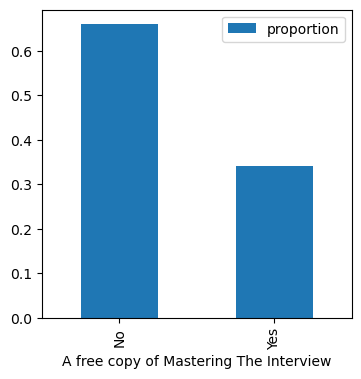



----------------------------------------------------------------------------------------------
Lead Source
Google               0.321356
Direct Traffic       0.293896
Olark Chat           0.139965
Organic Search       0.136513
Reference            0.069512
Welingak Website     0.020242
Referral Sites       0.011768
Facebook             0.004394
Click2call           0.000628
bing                 0.000471
Social Media         0.000314
Live Chat            0.000314
Pay per Click Ads    0.000157
WeLearn              0.000157
testone              0.000157
Press_Release        0.000157
Name: proportion, dtype: float64


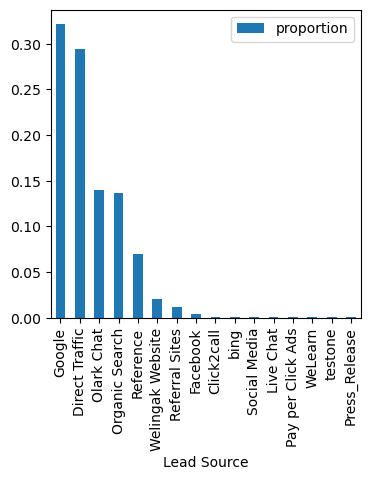



----------------------------------------------------------------------------------------------
Specialization
Select                               0.288404
Finance Management                   0.116899
Human Resource Management            0.104346
Marketing Management                 0.104033
Operations Management                0.061353
Business Administration              0.048643
IT Projects Management               0.043622
Supply Chain Management              0.043151
Banking, Investment And Insurance    0.041739
Media and Advertising                0.025263
Travel and Tourism                   0.023380
International Business               0.021340
Healthcare Management                0.019143
Hospitality Management               0.014122
E-COMMERCE                           0.012553
Retail Management                    0.012239
Rural and Agribusiness               0.009101
E-Business                           0.006747
Services Excellence                  0.003923
Name: proporti

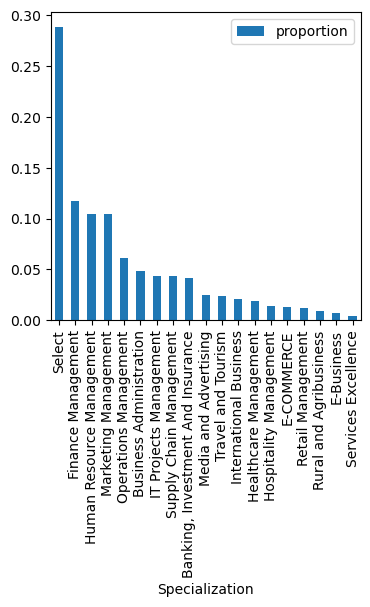



----------------------------------------------------------------------------------------------
Lead Origin
Landing Page Submission    0.568806
API                        0.335792
Lead Add Form              0.091166
Lead Import                0.004237
Name: proportion, dtype: float64


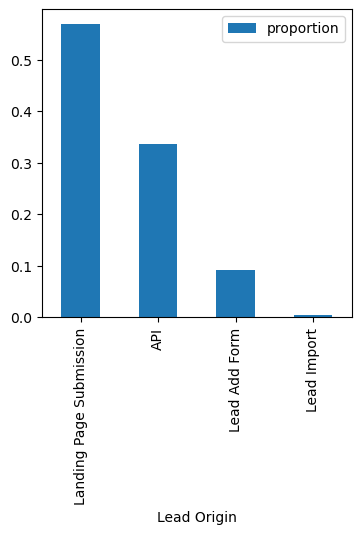



----------------------------------------------------------------------------------------------
What is your current occupation
Unemployed              0.859250
Working Professional    0.105602
Student                 0.030284
Other                   0.002354
Housewife               0.001412
Businessman             0.001098
Name: proportion, dtype: float64


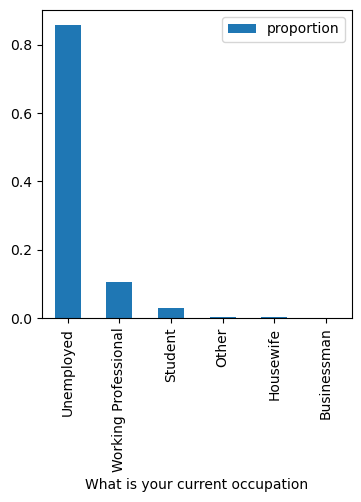



----------------------------------------------------------------------------------------------
Last Notable Activity
Email Opened                    0.319787
Modified                        0.305508
SMS Sent                        0.293268
Page Visited on Website         0.033422
Email Link Clicked              0.017260
Olark Chat Conversation         0.011925
Email Bounced                   0.007689
Unsubscribed                    0.004864
Unreachable                     0.003452
Had a Phone Conversation        0.002040
Email Marked Spam               0.000314
Approached upfront              0.000157
View in browser link Clicked    0.000157
Email Received                  0.000157
Name: proportion, dtype: float64


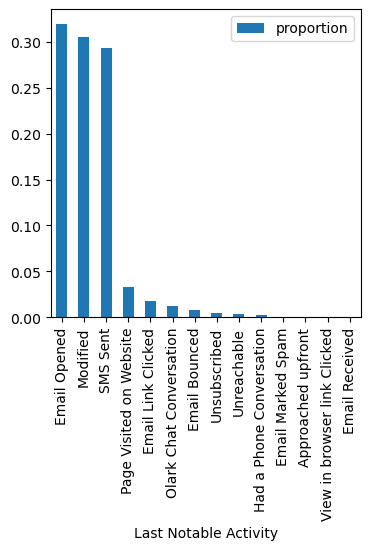



----------------------------------------------------------------------------------------------
Last Activity
Email Opened                    0.385219
SMS Sent                        0.343480
Olark Chat Conversation         0.067158
Page Visited on Website         0.067001
Converted to Lead               0.045818
Email Link Clicked              0.027930
Email Bounced                   0.027460
Form Submitted on Website       0.012710
Unreachable                     0.011141
Unsubscribed                    0.006276
Had a Phone Conversation        0.003609
Approached upfront              0.000785
View in browser link Clicked    0.000628
Email Received                  0.000314
Email Marked Spam               0.000314
Visited Booth in Tradeshow      0.000157
Name: proportion, dtype: float64


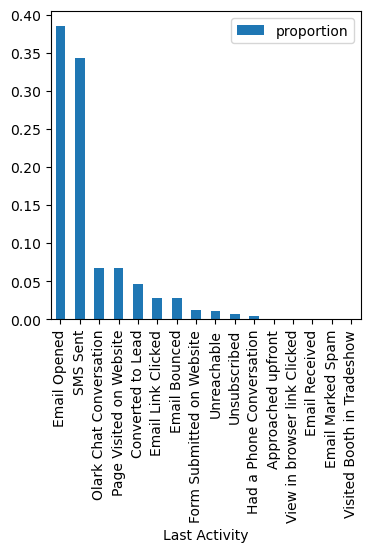



----------------------------------------------------------------------------------------------
Do Not Email
No     0.931743
Yes    0.068257
Name: proportion, dtype: float64


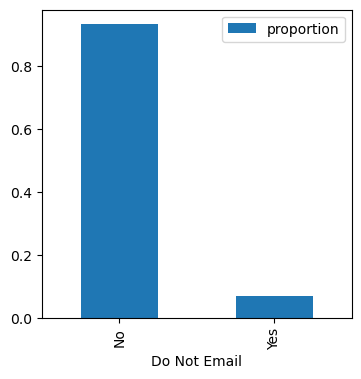



----------------------------------------------------------------------------------------------


In [32]:
for i in categ_columns:
    print(leads[i].value_counts(normalize=True, dropna= False))
    plt.figure(figsize=[4,4])
    leads[i].value_counts(normalize=True, dropna=False).plot.bar()
    plt.legend()
    plt.show()
    print("\n")
    print('----------------------------------------------------------------------------------------------')

## Outlier Analysis

In [33]:
num_columns = leads.describe().columns
num_columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

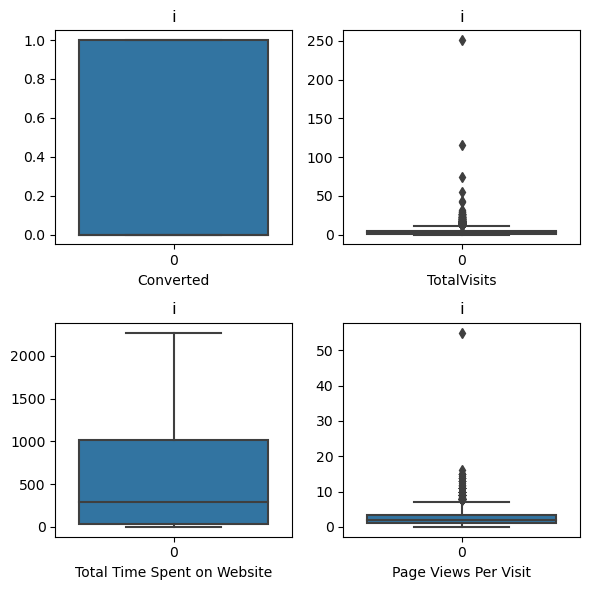

In [34]:
fig = plt.figure(figsize=(6,6))

c = 1
for i in num_columns:
    plt.subplot(2, 2, c)
    plt.title("i")
    plt.xlabel(i)
    sns.boxplot(leads[i])
    c = c + 1

fig.tight_layout()
plt.show()

In [35]:
# Looks like there are outliers in 'Page Views Per Visit' and 'TotalVisits' but leting them be cause they are significant for the analysis

In [36]:
# Analaysis the target column:

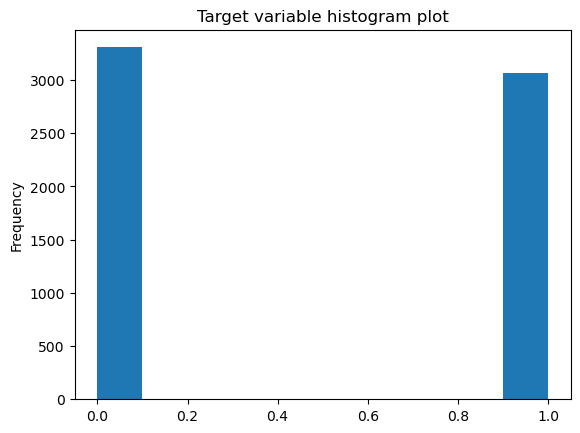

In [37]:
leads.Converted.plot.hist()
plt.title("Target variable histogram plot")
plt.show()

In [38]:
# No data imbalance as such is found.

## Dummy Variables Creation

In [39]:
# Checking the columns which are of type 'object'

temp = leads.select_dtypes(include=['object'])
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [40]:
# Creating dummy variables and dropping one of each as they become redundant
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True).astype(int)

# Adding the results to the dataframe
leads = pd.concat([leads, dummy], axis=1)

In [41]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [42]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' 
# Since select is useless for us, we will seperately mention the dropping of select instead of mentioning drop_first = True

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization').astype(int)
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis = 1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [43]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis = 1)

In [45]:
leads.shape

(6373, 75)

## Train-Test-Split

In [46]:
# Next we split the dataset into train and test set.

In [47]:
# Putting all the feature variables in X

X = leads.drop(['Converted'], axis = 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
# Putting the target variable in y

y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [49]:
# Splitting the dataset into 70% train and 30% test set with random state 100.

X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Scaling 

In [50]:
# We will scale the numerical variables

scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 
                                            'Total Time Spent on Website', 'Page Views Per Visit']])

In [51]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.064874,-0.824395,-0.223652,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.064874,-0.611929,0.753710,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.431907,-0.804919,1.731071,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,-0.669191,-0.943022,-1.201013,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,-0.669191,-0.943022,-1.201013,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Heatmap for visualising correlations.

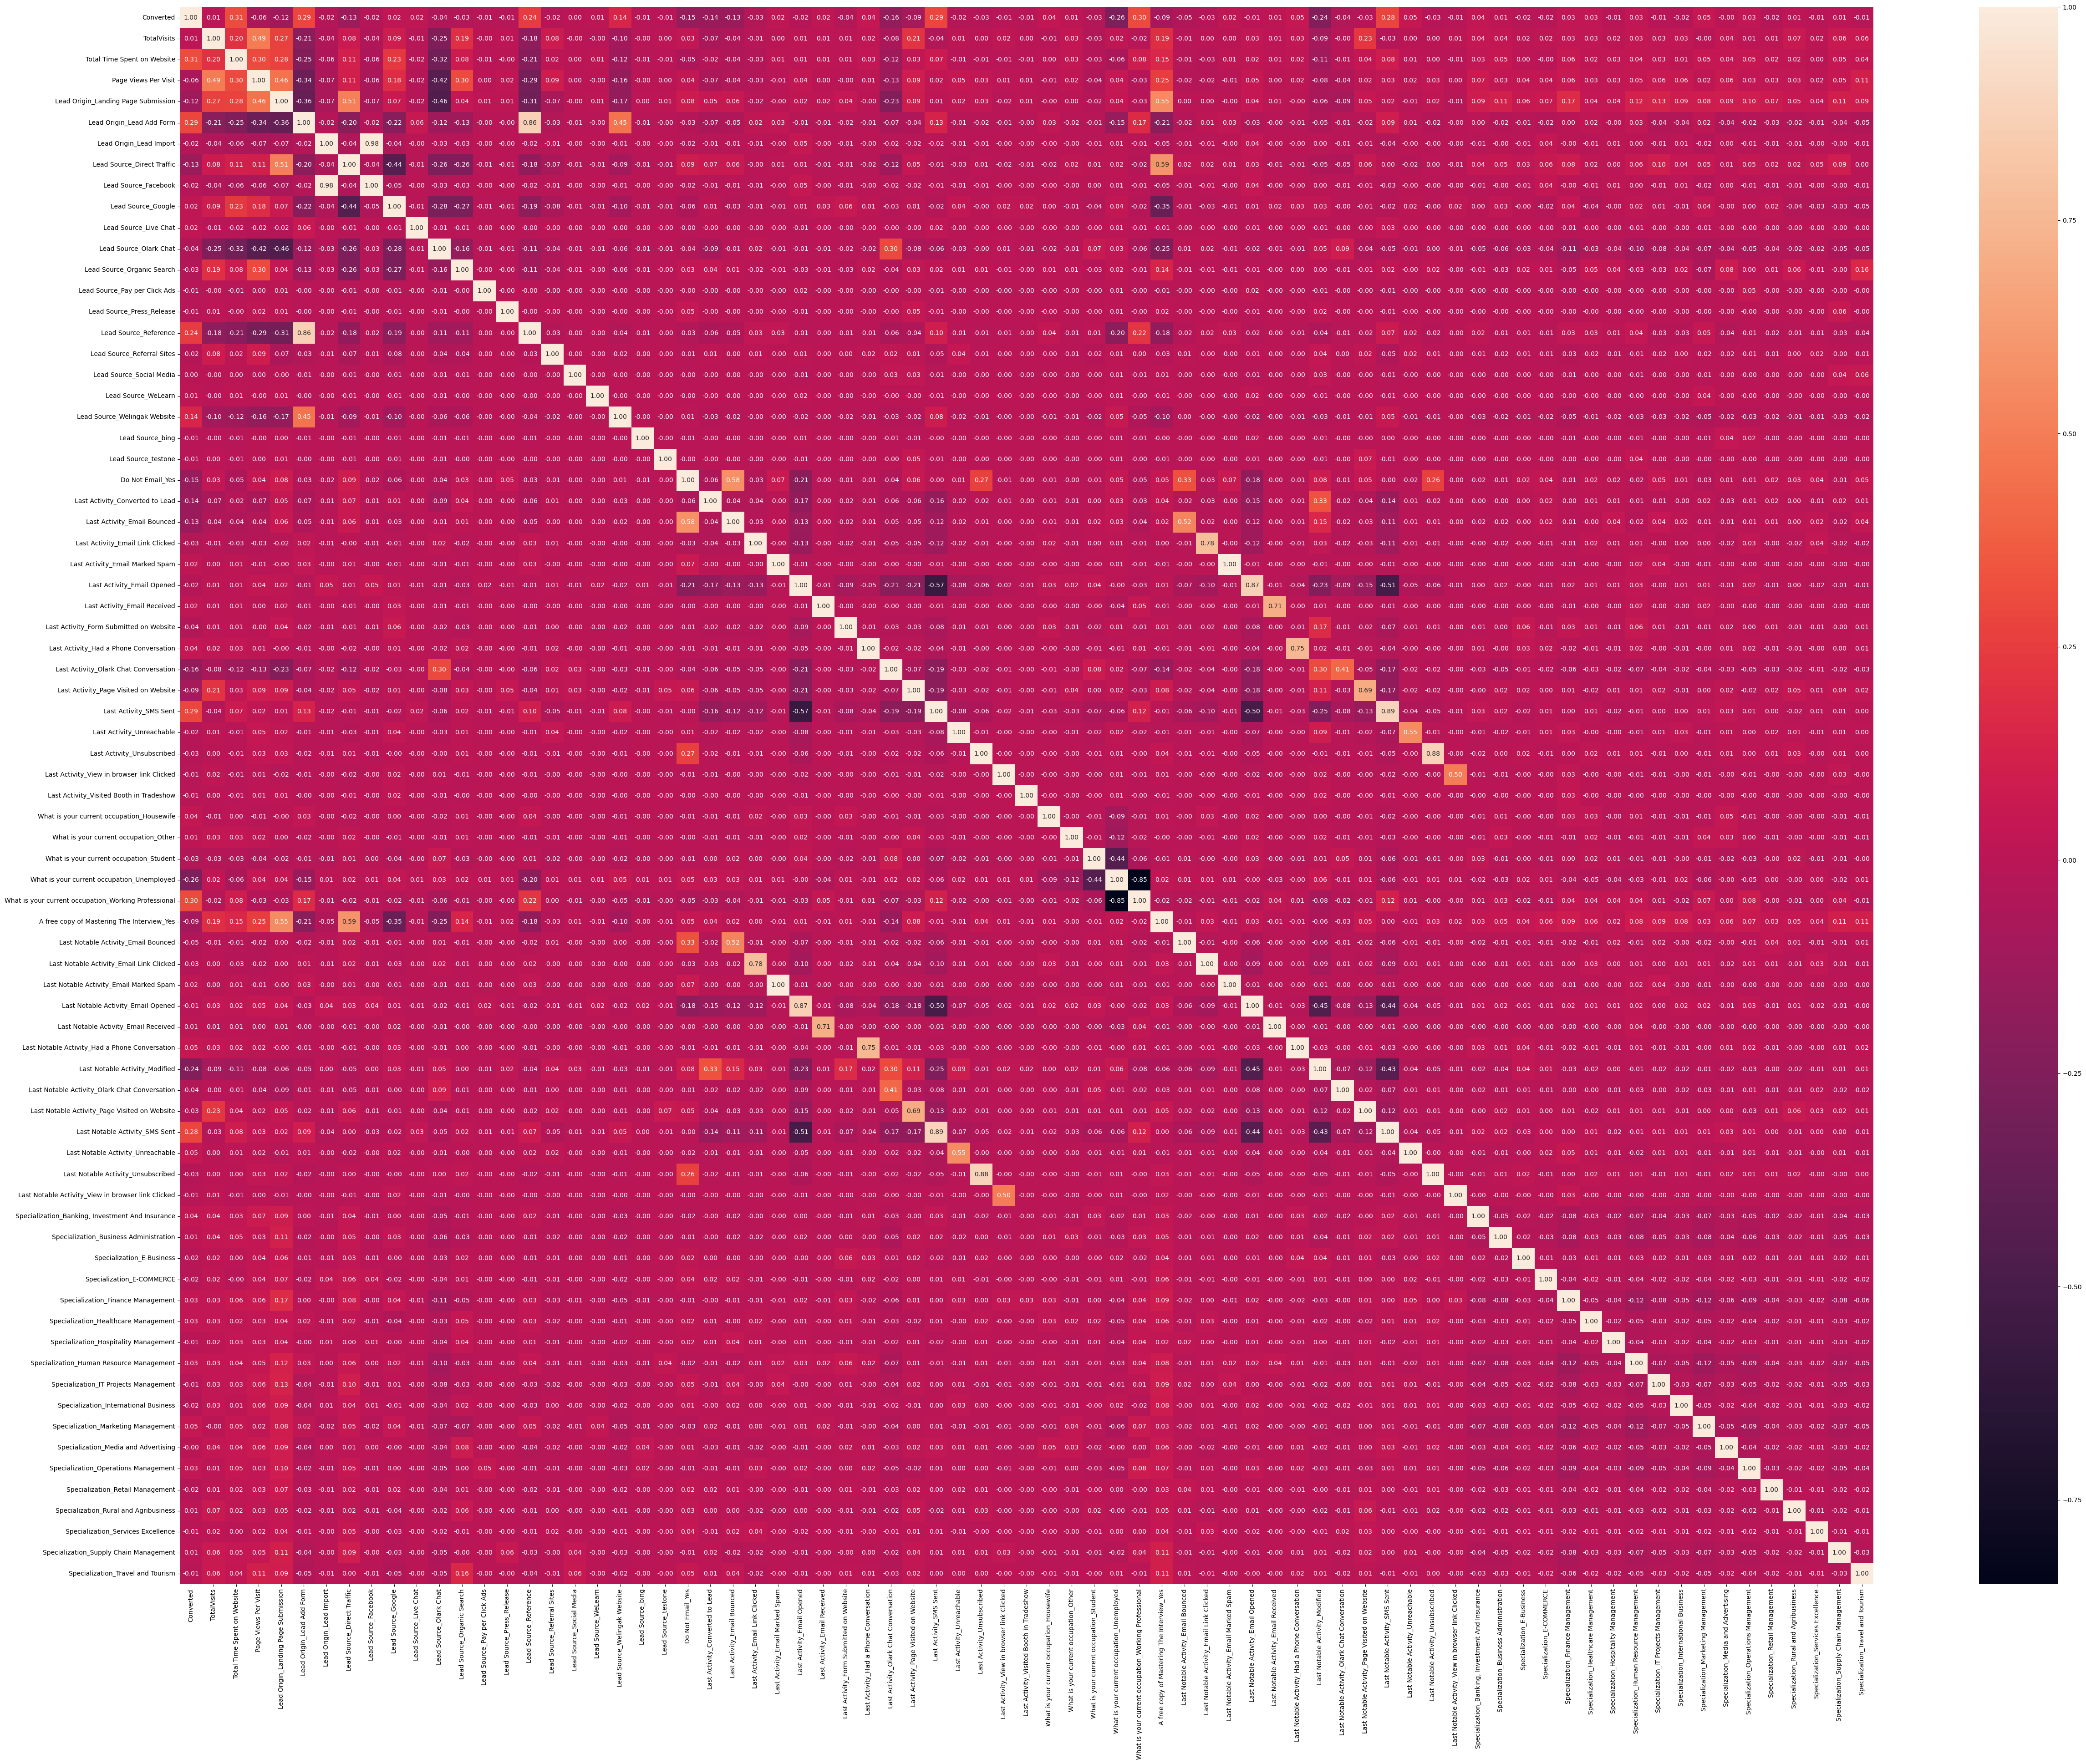

In [165]:
plt.figure(figsize = (60,45))
sns.heatmap(leads.corr(), annot = True, fmt=".2f")
plt.show()

## Step 2: Model Building


Let's now move to the model building. As we can see that there are a lot of variables present in the dataset which we cannot 
deal with. So the best way to approach this is to select a small set of features from this pool of variables using Recursive feature elimination. 

In [53]:
# Necessary libraries already imported, running rfe with 15 variable cutoff.
logreg = LogisticRegression()

rfe = RFE(estimator=logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [54]:
# Features selected by RFE.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 41),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 25),
 ('Lead Source_Facebook', False, 53),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Pay per Click Ads', False, 42),
 ('Lead Source_Press_Release', False, 55),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Social Media', False, 60),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 27),
 ('Lead Source_testone', False, 37),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 22),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link

In [55]:
# Putting all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [56]:
# Selecting the columns selected by RFE

X_train = X_train[col]

## Model 1



In [57]:
# Fitting a logistic Regression model on X_train after adding a constant using stats model.

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2038.7
Date:                Tue, 19 Nov 2024   Deviance:                       4077.4
Time:                        19:13:26   Pearson chi2:                 4.69e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3756
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6583      0.602      1.094      0.274      -0.521       1.838
Total Time Spent on Website                              1.0948      0.046     23.674      0.000       1.004       1.185
Lead Origin_Lead Add Form                                2.8029      1.219      2.299      0.022       0.413       5.193
Lead Source_Olark Chat                                   1.2977      0.114     11.342      0.000       1.073       1.522
Lead Source_Reference                                    1.2756      1.243      1.026      0.305      -1.161       3.712
Lead Source_Welingak Website                             3.2908      1.580      2.082      0.037       0.193       6.388
Do Not Email_Yes                                        -1.4166      0.193     -7.327      0.000      -1.795      -1.038
Last Activity_Had a Phone Conversation                   1.6253      0.984      1.652      0.099      -0.304       3.554
Last Activity_SMS Sent                                   0.9927      0.084     11.771      0.000       0.827       1.158
What is your current occupation_Housewife               22.4128   2.39e+04      0.001      0.999   -4.69e+04    4.69e+04
What is your current occupation_Student                 -1.3322      0.639     -2.085      0.037      -2.585      -0.080
What is your current occupation_Unemployed              -1.4578      0.603     -2.418      0.016      -2.639      -0.276
What is your current occupation_Working Professional     1.1501      0.632      1.820      0.069      -0.088       2.389
Last Notable Activity_Had a Phone Conversation          22.4823   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Modified                          -0.8433      0.090     -9.400      0.000      -1.019      -0.667
Last Notable Activity_Unreachable                        2.4696      0.807      3.061      0.002       0.888       4.051
========================================================================================================================
"""

In [58]:
# Lets take a look at the vifs for these 15 chosen variables. 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,84.15
3,Lead Source_Reference,65.19
4,Lead Source_Welingak Website,20.03
6,Last Activity_Had a Phone Conversation,2.45
12,Last Notable Activity_Had a Phone Conversation,2.44
10,What is your current occupation_Unemployed,2.43
7,Last Activity_SMS Sent,1.68
13,Last Notable Activity_Modified,1.57
2,Lead Source_Olark Chat,1.37
11,What is your current occupation_Working Profes...,1.31


In [59]:
# Lets start by dropping Lead Source_Reference as it has both high vif and p-value.

X_train.drop('Lead Source_Reference', axis = 1, inplace=True)

## Model 2

In [60]:
# Refitting the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2039.1
Date:                Tue, 19 Nov 2024   Deviance:                       4078.2
Time:                        19:13:26   Pearson chi2:                 4.67e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3755
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6590      0.602      1.095      0.273      -0.520       1.838
Total Time Spent on Website                              1.0948      0.046     23.672      0.000       1.004       1.185
Lead Origin_Lead Add Form                                4.0401      0.256     15.794      0.000       3.539       4.541
Lead Source_Olark Chat                                   1.2976      0.114     11.340      0.000       1.073       1.522
Lead Source_Welingak Website                             2.0535      1.037      1.980      0.048       0.020       4.087
Do Not Email_Yes                                        -1.4149      0.193     -7.325      0.000      -1.794      -1.036
Last Activity_Had a Phone Conversation                   1.6255      0.984      1.652      0.099      -0.303       3.554
Last Activity_SMS Sent                                   0.9929      0.084     11.774      0.000       0.828       1.158
What is your current occupation_Housewife               22.4142   2.39e+04      0.001      0.999   -4.69e+04    4.69e+04
What is your current occupation_Student                 -1.3317      0.639     -2.084      0.037      -2.584      -0.080
What is your current occupation_Unemployed              -1.4586      0.603     -2.420      0.016      -2.640      -0.277
What is your current occupation_Working Professional     1.1503      0.632      1.821      0.069      -0.088       2.389
Last Notable Activity_Had a Phone Conversation          22.4824   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Modified                          -0.8434      0.090     -9.403      0.000      -1.019      -0.668
Last Notable Activity_Unreachable                        2.4700      0.807      3.062      0.002       0.889       4.051
========================================================================================================================
"""

In [61]:
# Lets take a look at the vifs for these 14 variables. 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Had a Phone Conversation,2.45
11,Last Notable Activity_Had a Phone Conversation,2.44
9,What is your current occupation_Unemployed,2.43
6,Last Activity_SMS Sent,1.68
1,Lead Origin_Lead Add Form,1.65
12,Last Notable Activity_Modified,1.57
2,Lead Source_Olark Chat,1.37
3,Lead Source_Welingak Website,1.33
10,What is your current occupation_Working Profes...,1.31
0,Total Time Spent on Website,1.28


In [62]:
# All vifs are in range now, so we can go ahead and remove the few more variables with high p-value. 

X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace=True)

## Model 3

In [63]:
# Refitting the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2041.1
Date:                Tue, 19 Nov 2024   Deviance:                       4082.2
Time:                        19:13:26   Pearson chi2:                 4.67e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3749
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6621      0.602      1.101      0.271      -0.517       1.841
Total Time Spent on Website                              1.0934      0.046     23.650      0.000       1.003       1.184
Lead Origin_Lead Add Form                                4.0398      0.256     15.790      0.000       3.538       4.541
Lead Source_Olark Chat                                   1.2964      0.114     11.329      0.000       1.072       1.521
Lead Source_Welingak Website                             2.0524      1.037      1.978      0.048       0.019       4.086
Do Not Email_Yes                                        -1.4145      0.193     -7.323      0.000      -1.793      -1.036
Last Activity_Had a Phone Conversation                   2.8923      0.799      3.621      0.000       1.327       4.458
Last Activity_SMS Sent                                   0.9911      0.084     11.756      0.000       0.826       1.156
What is your current occupation_Housewife               21.4143   1.45e+04      0.001      0.999   -2.84e+04    2.85e+04
What is your current occupation_Student                 -1.3321      0.639     -2.085      0.037      -2.584      -0.080
What is your current occupation_Unemployed              -1.4585      0.603     -2.420      0.016      -2.640      -0.277
What is your current occupation_Working Professional     1.1492      0.632      1.819      0.069      -0.089       2.387
Last Notable Activity_Modified                          -0.8522      0.090     -9.511      0.000      -1.028      -0.677
Last Notable Activity_Unreachable                        2.4663      0.807      3.057      0.002       0.885       4.047
========================================================================================================================
"""

In [64]:
# Dropping `What is your current occupation_Housewife`.
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

## Model 4

In [65]:
# Refitting the model with the new set of features

logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2043.1
Date:                Tue, 19 Nov 2024   Deviance:                       4086.2
Time:                        19:13:26   Pearson chi2:                 4.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3744
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1870      0.552      2.148      0.032       0.104       2.270
Total Time Spent on Website                              1.0930      0.046     23.647      0.000       1.002       1.184
Lead Origin_Lead Add Form                                4.0395      0.256     15.792      0.000       3.538       4.541
Lead Source_Olark Chat                                   1.2949      0.114     11.315      0.000       1.071       1.519
Lead Source_Welingak Website                             2.0525      1.037      1.979      0.048       0.019       4.086
Do Not Email_Yes                                        -1.4186      0.193     -7.334      0.000      -1.798      -1.039
Last Activity_Had a Phone Conversation                   2.8916      0.799      3.620      0.000       1.326       4.457
Last Activity_SMS Sent                                   0.9914      0.084     11.760      0.000       0.826       1.157
What is your current occupation_Student                 -1.8569      0.593     -3.131      0.002      -3.019      -0.695
What is your current occupation_Unemployed              -1.9833      0.554     -3.581      0.000      -3.069      -0.898
What is your current occupation_Working Professional     0.6242      0.585      1.067      0.286      -0.523       1.771
Last Notable Activity_Modified                          -0.8508      0.090     -9.502      0.000      -1.026      -0.675
Last Notable Activity_Unreachable                        2.4648      0.807      3.054      0.002       0.883       4.046
========================================================================================================================
"""

In [66]:
# Lastly dropping What is your current occupation_Working Professional.
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)


## Model 5

In [67]:
# Refitting the model with the final set of features

logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res1 = logm5.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2043.7
Date:                Tue, 19 Nov 2024   Deviance:                       4087.3
Time:                        19:13:26   Pearson chi2:                 4.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3742
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.7491      0.188      9.296      0.000       1.380       2.118
Total Time Spent on Website                    1.0931      0.046     23.647      0.000       1.003       1.184
Lead Origin_Lead Add Form                      4.0410      0.256     15.799      0.000       3.540       4.542
Lead Source_Olark Chat                         1.2964      0.114     11.330      0.000       1.072       1.521
Lead Source_Welingak Website                   2.0508      1.037      1.977      0.048       0.018       4.084
Do Not Email_Yes                              -1.4175      0.193     -7.328      0.000      -1.797      -1.038
Last Activity_Had a Phone Conversation         2.8940      0.799      3.624      0.000       1.329       4.459
Last Activity_SMS Sent                         0.9945      0.084     11.810      0.000       0.829       1.159
What is your current occupation_Student       -2.4199      0.284     -8.513      0.000      -2.977      -1.863
What is your current occupation_Unemployed    -2.5468      0.188    -13.542      0.000      -2.915      -2.178
Last Notable Activity_Modified                -0.8510      0.090     -9.504      0.000      -1.026      -0.675
Last Notable Activity_Unreachable              2.4662      0.807      3.056      0.002       0.885       4.048
==============================================================================================================
"""

In [68]:
# Lets take a look at the vifs for the final model. 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,2.19
6,Last Activity_SMS Sent,1.52
1,Lead Origin_Lead Add Form,1.51
9,Last Notable Activity_Modified,1.50
2,Lead Source_Olark Chat,1.34
3,Lead Source_Welingak Website,1.30
0,Total Time Spent on Website,1.24
4,Do Not Email_Yes,1.09
7,What is your current occupation_Student,1.04
5,Last Activity_Had a Phone Conversation,1.01


## All of the chosen variables have proper p-values and good vifs so we are good to go!

## Step 3: Model Evaluation

In [69]:
# Using 'predict' to predict the probabilities on the train set

y_train_pred = res1.predict(sm.add_constant(X_train))

In [70]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33083001, 0.08967657, 0.07388062, 0.37000908, 0.96109341,
       0.1206137 , 0.12330796, 0.91373557, 0.05187475, 0.98611847])

In [71]:
# Creating a dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.330830
1,0,0.089677
2,1,0.073881
3,1,0.370009
4,1,0.961093


In [72]:
# Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [73]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's take a look at the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.330830,0
1,0,0.089677,0
2,1,0.073881,0
3,1,0.370009,0
4,1,0.961093,1


In [74]:
# Creating confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1939  373]
 [ 559 1590]]


In [75]:
# Check the accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7910782335799148


In [76]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [77]:
# Calculating the sensitivity

TP/(TP+FN)

0.7398790134946487

In [78]:
# Calculate the specificity

TN/(TN+FP)

0.8386678200692042

## Finding the Optimal Cutoff


In [79]:
# Now 0.5 was just arbitrary to loosely check the model performace. 
# But in order to get good results, you need to optimise the threshold. 
# So first let's plot an ROC curve to see what AUC we get.

In [80]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [81]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

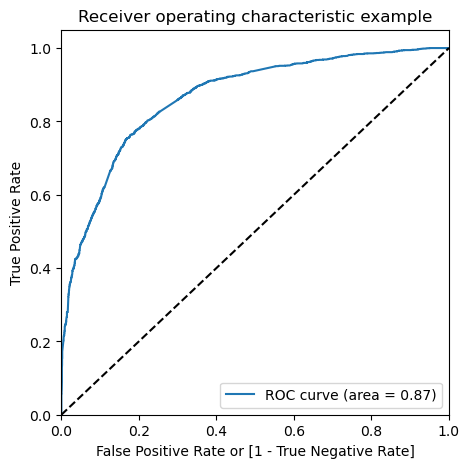

In [82]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [83]:
# The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. 
# Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [84]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.330830,0,1,1,1,1,0,0,0,0,0,0
1,0,0.089677,0,1,0,0,0,0,0,0,0,0,0
2,1,0.073881,0,1,0,0,0,0,0,0,0,0,0
3,1,0.370009,0,1,1,1,1,0,0,0,0,0,0
4,1,0.961093,1,1,1,1,1,1,1,1,1,1,1


In [85]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.572517  0.986040  0.188149
0.2   0.2  0.689980  0.949744  0.448529
0.3   0.3  0.765523  0.898557  0.641869
0.4   0.4  0.787267  0.805491  0.770329
0.5   0.5  0.791078  0.739879  0.838668
0.6   0.6  0.773593  0.668683  0.871107
0.7   0.7  0.740417  0.550954  0.916522
0.8   0.8  0.707241  0.442066  0.953720
0.9   0.9  0.659493  0.312238  0.982266


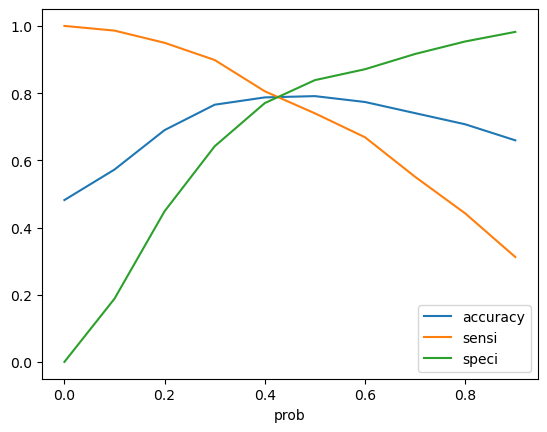

In [86]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [87]:
## We are getting 0.42 as the optimum cutoff.

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.330830,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.089677,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.073881,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.370009,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.961093,1,1,1,1,1,1,1,1,1,1,1,1


In [89]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7899574086527684

In [90]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion2)

[[1939  373]
 [ 559 1590]]


In [91]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [92]:
# Calculate Sensitivity

TP/(TP+FN)

0.7398790134946487

In [93]:
# Calculate Specificity

TN/(TN+FP)

0.8386678200692042

## Step 4: Making Predictions on the Test Set

In [94]:
# Scaling the test set as well using just 'transform'

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 
                                            'Total Time Spent on Website', 'Page Views Per Visit']])

In [95]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4771,-0.943022,1,0,1,0,0,0,1,0,0,0,1,0,0,0
6122,-0.826165,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9202,0.733689,0,0,0,0,0,0,1,0,0,1,0,0,0,0
6570,0.581422,0,0,0,0,1,0,1,0,0,1,0,0,0,0
2668,0.646932,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [96]:
X_test.shape

(1912, 15)

In [97]:
X_train.shape

(4461, 11)

In [98]:
# Dropping the columns form X_test that we manually dropped from X_train as well.

In [99]:
X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 
                     'Last Notable Activity_Had a Phone Conversation'], axis = 1, 
                                inplace = True)

In [100]:
X_test.shape

(1912, 11)

In [101]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

In [102]:
# Making predictions on the test set and storing it in the variable 'y_test_pred'

y_test_pred = res1.predict(sm.add_constant(X_test))

In [103]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [104]:
# Let's see the head

y_pred_1.head()

,0
4771,0.996839
6122,0.154358
9202,0.730812
6570,0.357733
2668,0.513236


In [105]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [106]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [107]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [108]:
# Checking 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.996839
1,0,0.154358
2,0,0.730812
3,1,0.357733
4,1,0.513236


In [109]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [110]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996839
1,0,0.154358
2,0,0.730812
3,1,0.357733
4,1,0.513236


In [111]:
# Making predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [112]:
# Checking y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996839,1
1,0,0.154358,0
2,0,0.730812,1
3,1,0.357733,0
4,1,0.513236,1


In [113]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7892259414225942

In [114]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[787, 209],
       [194, 722]], dtype=int64)

In [115]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [116]:
# Calculate sensitivity
TP / float(TP+FN)

0.7882096069868996

In [117]:
# Calculate specificity
TN / float(TN+FP)

0.7901606425702812

## Precision-Recall View
Let's now also build the training model using the precision-recall view

In [118]:
#Looking at the confusion matrix again

In [119]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1939,  373],
       [ 559, 1590]], dtype=int64)

## Precision
TP / TP + FP

In [120]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8099847172694855

## Recall
TP / TP + FN

In [121]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7398790134946487

In [122]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
 5       0
 6       0
 7       1
 8       0
 9       1
 10      0
 11      0
 12      1
 13      1
 14      0
 15      1
 16      1
 17      1
 18      1
 19      1
 20      0
 21      0
 22      1
 23      0
 24      0
 25      0
 26      1
 27      0
 28      1
 29      0
 30      0
 31      0
 32      0
 33      0
 34      0
 35      1
 36      0
 37      0
 38      0
 39      1
 40      0
 41      1
 42      0
 43      0
 44      1
 45      0
 46      0
 47      1
 48      0
 49      1
 50      0
 51      0
 52      1
 53      1
 54      1
 55      0
 56      0
 57      0
 58      0
 59      0
 60      0
 61      0
 62      1
 63      0
 64      1
 65      0
 66      0
 67      0
 68      0
 69      0
 70      1
 71      1
 72      1
 73      0
 74      1
 75      0
 76      0
 77      0
 78      1
 79      1
 80      0
 81      0
 82      1
 83      0
 84      1
 85      1
 86      1
 87      1
 88      1
 89      1
 90      0

In [123]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

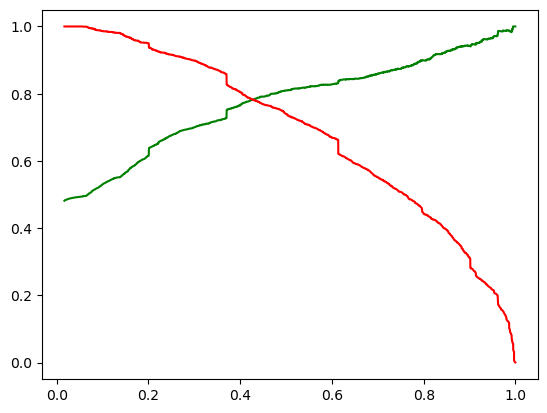

In [124]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [125]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.330830,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.089677,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.073881,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.370009,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.961093,1,1,1,1,1,1,1,1,1,1,1,1


In [126]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7917507285362027

In [127]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1865,  447],
       [ 482, 1667]], dtype=int64)

In [128]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
# Calculating Precision

TP/(TP+FP)

0.7885525070955535

In [130]:
# Calculating Recall

TP/(TP+FN)

0.7757096323871568

## Step 4: Making Predictions on the Test Set¶
Let's now make predicitons on the test set.

In [131]:
# Making predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res1.predict(sm.add_constant(X_test))

In [132]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [133]:
# Let's see the head

y_pred_1.head()

,0
4771,0.996839
6122,0.154358
9202,0.730812
6570,0.357733
2668,0.513236


In [134]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [135]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [136]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [137]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.996839
1,0,0.154358
2,0,0.730812
3,1,0.357733
4,1,0.513236


In [138]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [139]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996839
1,0,0.154358
2,0,0.730812
3,1,0.357733
4,1,0.513236


In [140]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [141]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996839,1
1,0,0.154358,0
2,0,0.730812,1
3,1,0.357733,0
4,1,0.513236,1


In [142]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7866108786610879

In [143]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[799, 197],
       [211, 705]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Calculate Precision

TP/(TP+FP)

0.7815964523281597

In [146]:
# Calculate Recall

TP/(TP+FN)

0.769650655021834

# THE END